In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("Customer Churn.csv")

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data["TotalCharges"]=data["TotalCharges"].replace(" ", 0)  ## Here we fixed the blank values by replacing it with the Zero
data["TotalCharges"]=data["TotalCharges"].astype("float")

## Here we fixed the blank values by replacing it with the Zero as tenure is 0 (zero) and no total charge are recorded 
## And we also changes its data type to float

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
data.isnull().sum()   ## SO THERE IS NO NULL VALUES IN THE DATASET 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
(data=="").sum()  # empty string
(data==" ").sum() # empty space

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## this is also usefull to check that there is any blank space or empty string or not in the dataframe

In [9]:
## Best practice done by data experts if there is any null value it will show true else false
  
data.isnull().values.any()

np.False_

In [10]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


data.loc[7041]   ## this is the senior citizen

In [11]:
data["customerID"].duplicated().sum()


np.int64(0)

# The output is zero here so that means that there is no duplicate values in it

In [12]:
def convert(value):
    if value==1:
        return "Yes"
    else:
        return "No"

data["SeniorCitizen"]=data["SeniorCitizen"].apply(convert)


# Converted 0 and 1 values of Senior Citizen to Yes/No to make it easier to understand

In [13]:
data.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3714,7306-YDSOI,Male,No,Yes,Yes,69,Yes,No,DSL,Yes,...,Yes,No,No,No,Two year,Yes,Bank transfer (automatic),59.75,4069.90,No
5515,2892-GESUL,Female,No,Yes,Yes,18,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,309.25,No
679,2826-UWHIS,Male,No,Yes,No,45,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),81.40,3775.85,No
6373,0943-ZQPXH,Male,No,Yes,Yes,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),92.95,4122.90,No
6946,9013-AQORL,Female,No,No,Yes,48,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,No,Credit card (automatic),45.55,2108.35,No
5783,1415-YFWLT,Female,Yes,No,No,1,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,89.30,89.30,Yes
2983,4674-HGNUA,Male,No,Yes,Yes,71,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),89.90,6457.15,No
2206,3207-OYBWH,Male,Yes,Yes,No,57,Yes,Yes,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),95.25,5427.05,Yes
1615,2812-REYAT,Female,No,Yes,No,49,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),20.05,923.10,No
5243,7661-CPURM,Male,No,No,No,19,Yes,No,Fiber optic,No,...,No,Yes,No,Yes,One year,Yes,Credit card (automatic),87.70,1725.95,No


In [14]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


C:\Users\visha\AppData\Local\Temp\ipykernel_11192\2183551373.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=data, x="Churn", palette="Set2")


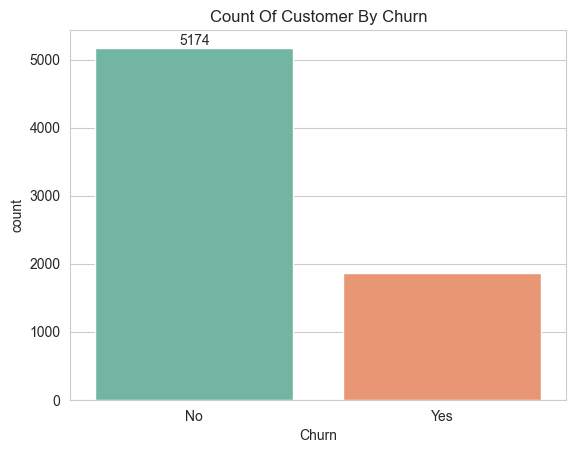

In [15]:
sns.set_style("whitegrid")
ax=sns.countplot(data=data, x="Churn", palette="Set2")
ax.bar_label(ax.containers[0])## this will help to get the exact count of the yes and no
plt.title("Count Of Customer By Churn")
plt.show()

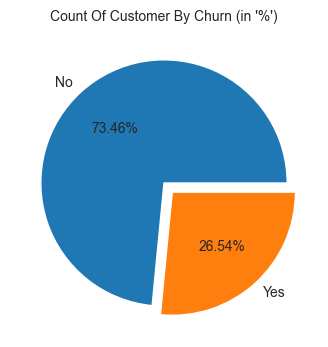

In [16]:
plt.figure(figsize=(4,4))
gb=data.groupby("Churn").agg({"Churn":"count"})
plt.pie(gb["Churn"],labels=gb.index,autopct='%1.2f%%', explode=[0,0.1])
plt.title("Count Of Customer By Churn (in '%')", fontsize=10)
plt.show()

# From the given Pie Chart we can conclude that 26.34% of our customers have churned out
# Now lets explore the reason behind it

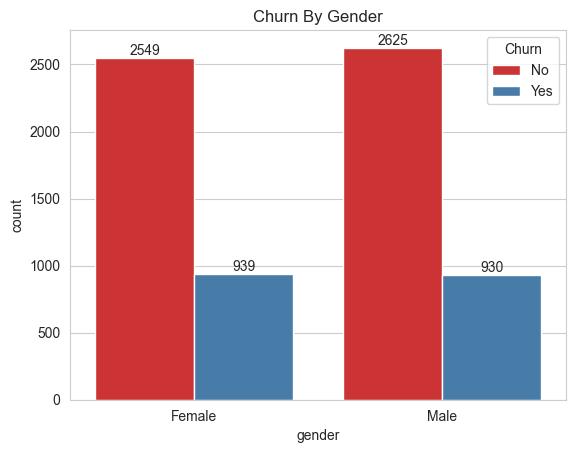

In [20]:
ax=sns.countplot(data=data, x="gender",hue="Churn" ,palette="Set1")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Churn By Gender")
plt.show()

              

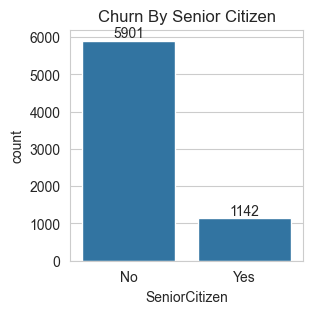

In [51]:
## Count of the Senior Citizens

plt.figure(figsize=(3,3))
sc=sns.countplot(data=data, x="SeniorCitizen")
for container in sc.containers:
    sc.bar_label(container)
plt.title("Churn By Senior Citizen")
plt.show()

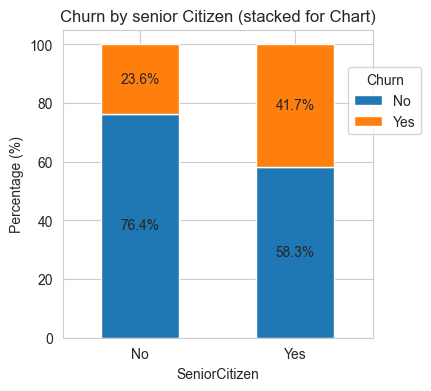

In [67]:
total_counts=data.groupby("SeniorCitizen")["Churn"].value_counts(normalize=True).unstack()*100  # calculate the percentage

fig, ax=plt.subplots(figsize=(4,4))    # Plot

##plot the bars
total_counts.plot(kind='bar', stacked="True",ax=ax)

## add percentage labels to the bar
for p in ax.patches:
    width , height=p.get_width(), p.get_height()
    x,y =p.get_xy()
    ax.text(x+width/2, y+height/2, f'{height:0.1f}%', ha="center", va="center")

plt.title("Churn by senior Citizen (stacked for Chart)")
plt.xlabel("SeniorCitizen")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)
plt.legend(title="Churn", bbox_to_anchor=(0.9,0.9)) 
plt.show()

# With the help of this plot we are able to get that compartive a greater percentage of people in Senior Citizen Catogory have churned

In [52]:
 data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


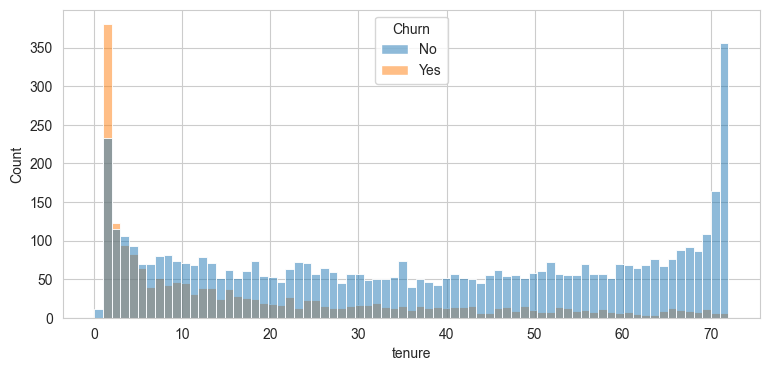

In [80]:
plt.figure(figsize=(9,4))
sns.histplot(data=data, x="tenure", hue="Churn",bins=73)
plt.show()

# People who have used our servive(high tenure) for a long time have stayed and who have used our services 1 Or 2 months have churned 

Text(0.5, 1.0, 'Count of churn based on Contract')

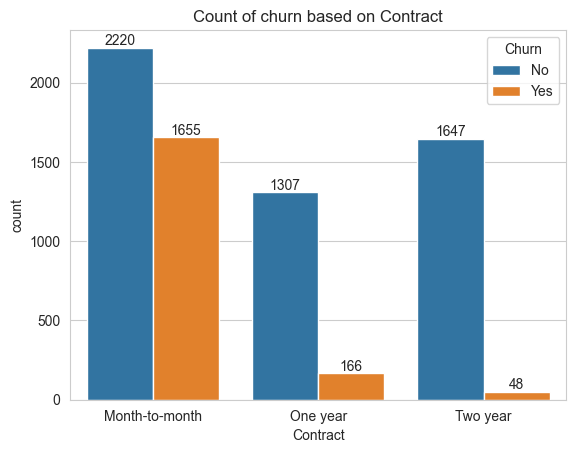

In [92]:
ax=sns.countplot(data=data,x="Contract", hue="Churn")
for container in ax.containers:
    ax.bar_label(container)

plt.title("Count of churn based on Contract")

# People who have month to month contract are likely to churn then from those who have 1 or 2 years od contract 

In [96]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<Axes: xlabel='PhoneService', ylabel='count'>

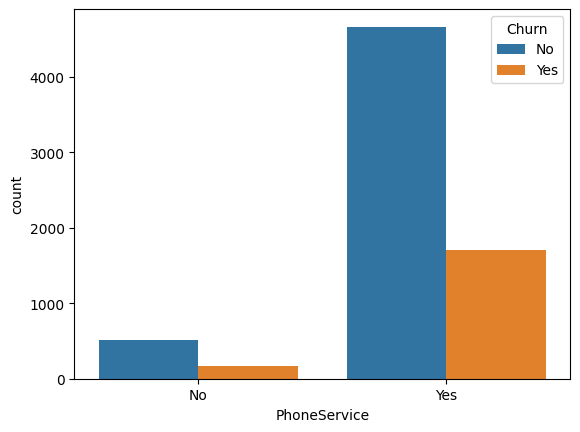

In [4]:
sns.countplot(data=data, x="PhoneService", hue="Churn")

In [8]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

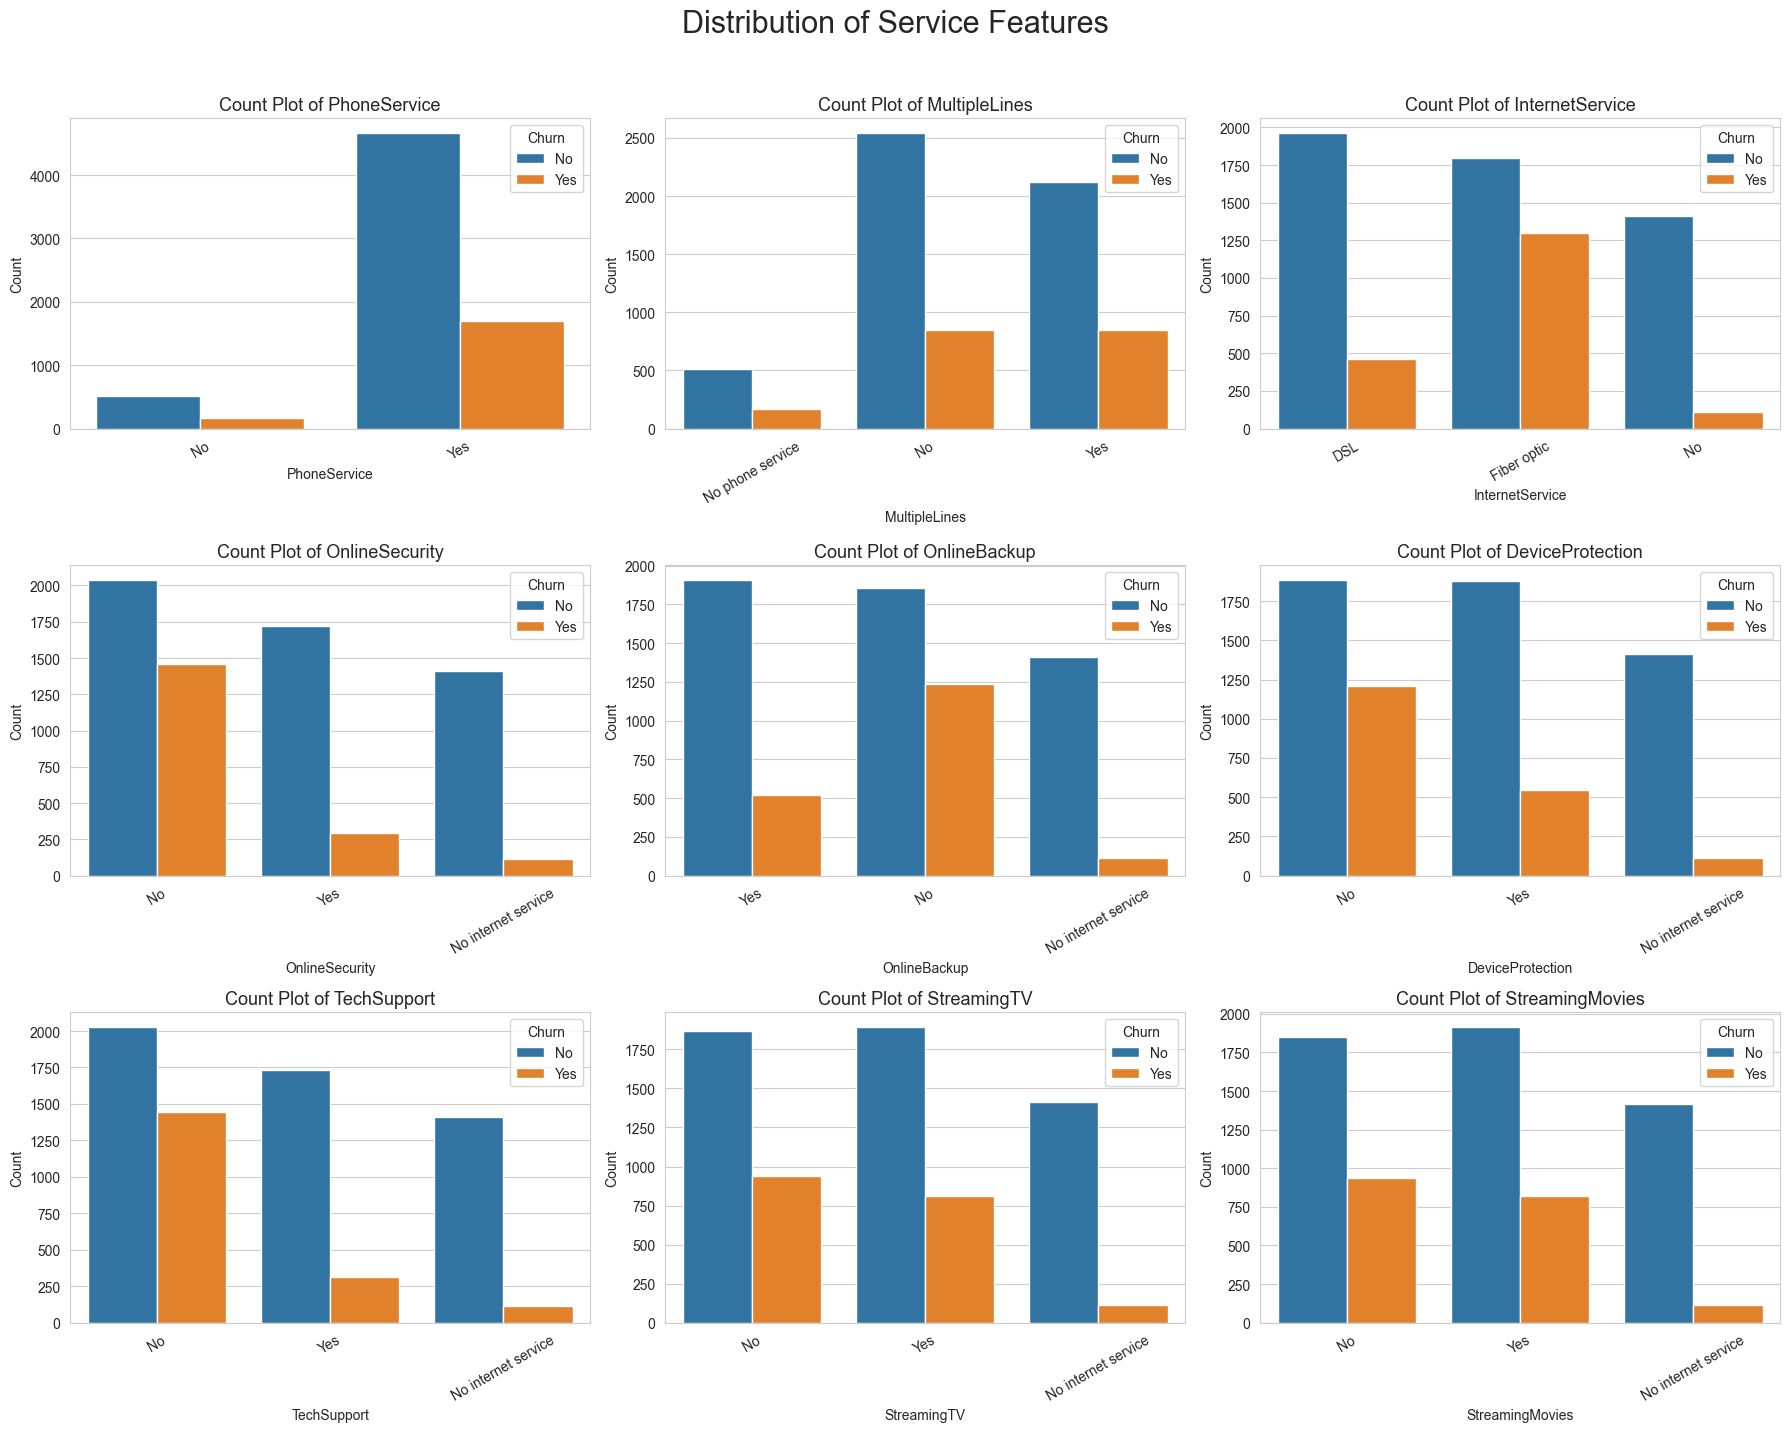

In [4]:
cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Set seaborn style
sns.set_style("whitegrid")

# Create subplot grid (3 × 3)
fig, axes = plt.subplots(3, 3, figsize=(18, 14))
axes = axes.flatten()

# Plot countplots
for i, col in enumerate(cols):
    sns.countplot(
        data=data,
        x=col,
        hue="Churn",
        ax=axes[i]          
    )
    axes[i].set_title(f'Count Plot of {col}', fontsize=13)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=30)

# Remove empty subplots (safety)
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

# Overall figure title (optional but recommended)
fig.suptitle('Distribution of Service Features', fontsize=22, y=1.02)

plt.tight_layout()
plt.show()


# These subplots show the distribution of customers across different service features segmented by churn, revealing that churn is notably higher among customers using Fiber Optic internet and those without value-added services such as OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport, while customers subscribed to support and security services tend to have lower churn, indicating that service quality and customer support play a crucial role in customer retention.

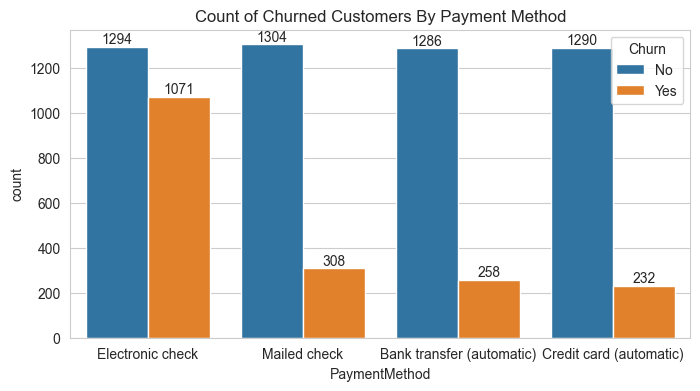

In [16]:
plt.figure(figsize=(8,4))
ax=sns.countplot(data=data, x="PaymentMethod",hue="Churn")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Count of Churned Customers By Payment Method") 
plt.show()


# Customer is more likely to Churn when he is using electronic check as a payment method

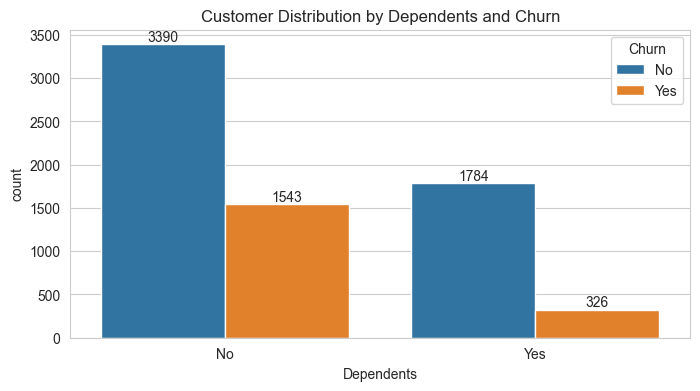

In [18]:
plt.figure(figsize=(8,4))
ax=sns.countplot(data=data, x="Dependents",hue="Churn")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Customer Distribution by Dependents and Churn") 
plt.show()


# The plot shows that customers without dependents have a significantly higher churn rate compared to those with dependents, indicating that having dependents is associated with greater customer stability and lower likelihood of churn